In [1]:
#To process:

# 1. Encoders
# 2. IMU
# 3. RTK
# 4. Laser
# 5. RICOH raw

In [2]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
#from mpldatacursor import datacursor
import time
import math
#import cv2
from cv_bridge import CvBridge

In [3]:
#READ BAG

fileroot='2020-12-23-UTS/'
filename='2020-12-23-UTS-L1'

saverpath='/media/maleen/malen_ssd/phd/cloud_academic/ams_data/datasets/'

bag  = rosbag.Bag('/media/maleen/malen_ssd/phd/critical_ams_data/'+fileroot+ filename + '.bag')

#bag  = rosbag.Bag('/media/maleen/malen_ssd/phd/critical_ams_data/'+fileroot+ filename + '.bag')


In [4]:
#READ TOPICS

encsize=0
imusize=0

rtkllasize=0
rtkenusize=0
rtksize=0

ricoh_time=np.array([])
encoder_time=np.array([])
encoder_seq=np.array([])
encoder_x=np.array([])
encoder_y=np.array([])

odom_time=np.array([])
odom_seq=np.array([])
odom_x=np.array([])
odom_y=np.array([])

odom_theta=np.array([])

odom_vx=np.array([])
odom_vy=np.array([])
odom_vtheta=np.array([])

imureal_time=np.array([])
imureal_seq=np.array([])
imureal_angvZ=np.array([])
imureal_angvX=np.array([])
imureal_angvY=np.array([])

rtklla_time=np.array([])
rtklla_seq=np.array([])
rtklla_lat=np.array([])
rtklla_long=np.array([])
rtklla_alti=np.array([])

rtkenu_time=np.array([])
rtkenu_seq=np.array([])
rtkenu_x=np.array([])
rtkenu_y=np.array([])
rtkenu_z=np.array([])

rtkfix_time=np.array([])
rtkfix_seq=np.array([])
rtkfix_lat=np.array([])
rtkfix_long=np.array([])
rtkfix_alti=np.array([])

laser_time=np.array([])
laser_seq=np.array([])
laser_range=np.array([])

overall_time=np.array([])
labels=np.array([])


topiclist=['/encoder_ticks','/odom','/casimu/imureal','/piksi/navsatfix_best_fix','/piksi/navsatfix_rtk_fix', '/piksi/enu_pose_best_fix','/scan','/back_cam/aligned_depth_to_color/image_raw'] #,
#'/ricoh/image_raw',
for topic, msg, t in bag.read_messages(topics=topiclist): #
    
        if topic=='/encoder_ticks':
            
            encoder_time=np.append(encoder_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            encoder_seq=np.append(encoder_seq,msg.header.seq)
            encoder_x=np.append(encoder_x,msg.ticks.x)
            encoder_y=np.append(encoder_y,msg.ticks.y)
            encsize=encsize+1
            overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            labels=np.append(labels,'O')
            
        elif topic=='/odom':
        
            odom_time=np.append(odom_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            odom_seq=np.append(odom_seq,msg.header.seq)
            
            odom_x=np.append(odom_x, msg.pose.pose.position.x)
            odom_y=np.append(odom_y, msg.pose.pose.position.y)
            odom_theta=np.append(odom_theta, msg.pose.pose.orientation.z)
            
            
            odom_vx=np.append(odom_vx, msg.twist.twist.linear.x)
            odom_vy=np.append(odom_vy, msg.twist.twist.linear.y)
            odom_vtheta=np.append(odom_vtheta, msg.twist.twist.angular.z)
            #overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            #labels=np.append(labels,'O')
            
            #encoder_data=np.append(encoder_data,[odom_time,odom_vx,odom_vy])
            
        elif topic=='/casimu/imureal':
        
            imureal_time=np.append(imureal_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            imureal_seq=np.append(imureal_seq,msg.header.seq)
            #print msg
            imureal_angvZ=np.append(imureal_angvZ,(msg.angular_velocity.z))
            imureal_angvX=np.append(imureal_angvX,(msg.angular_velocity.x))
            imureal_angvY=np.append(imureal_angvY,(msg.angular_velocity.y))
            imusize=imusize+1
            
        elif topic=='/piksi/navsatfix_best_fix':
        
            rtklla_time=np.append(rtklla_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtklla_seq=np.append(rtklla_seq,msg.header.seq)
            #print msg
            rtklla_lat=np.append(rtklla_lat,(msg.latitude))
            rtklla_long=np.append(rtklla_long,(msg.longitude))
            rtklla_alti=np.append(rtklla_alti,(msg.altitude))
            rtkllasize=rtkllasize+1
            
        elif topic=='/piksi/enu_pose_best_fix':
        
            rtkenu_time=np.append(rtkenu_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtkenu_seq=np.append(rtkenu_seq,msg.header.seq)
            rtkenu_x=np.append(rtkenu_x,(msg.pose.pose.position.x))
            rtkenu_y=np.append(rtkenu_y,(msg.pose.pose.position.y))
            rtkenu_z=np.append(rtkenu_z,(msg.pose.pose.position.z))
            rtkenusize=rtkenusize+1
            
        elif topic=='/piksi/navsatfix_rtk_fix':
        
            rtkfix_time=np.append(rtkfix_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtkfix_seq=np.append(rtkfix_seq,msg.header.seq)
            rtkfix_lat=np.append(rtkfix_lat,(msg.latitude))
            rtkfix_long=np.append(rtkfix_long,(msg.longitude))
            rtkfix_alti=np.append(rtkfix_alti,(msg.altitude))
            rtksize=rtksize+1
            
        elif topic=='/scan':
            laser_time=np.append(laser_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            laser_seq=np.append(laser_seq,msg.header.seq)
            laser_range=np.append(laser_range,msg.ranges)
            
#         elif topic=='/ricoh/image_raw':
#             ricoh_time=np.append(ricoh_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
         
        elif topic=='/back_cam/aligned_depth_to_color/image_raw':
            
            #print('yei')
            overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            labels=np.append(labels,'BC')
        
mainbag_time_zero=encoder_time[0]
print(encoder_time[0])

1608712661.281969866


In [5]:
# for x in ricoh_time:

#   print(x)

In [6]:
#BRING DATA TO ENCODER TIME

imureal_time=imureal_time-encoder_time[0]
odom_time=odom_time-encoder_time[0]
laser_time=laser_time-encoder_time[0]

rtklla_time=rtklla_time-encoder_time[0]
rtkenu_time=rtkenu_time-encoder_time[0]
rtkfix_time=rtkfix_time-encoder_time[0]

overall_time=overall_time-encoder_time[0]
ricoh_time=ricoh_time-encoder_time[0]

encoder_time=encoder_time-encoder_time[0]

In [7]:
#PROCESS ENCODER DATA

encoder_wraps_x=0
encoder_wraps_y=0


encoder_x_new=np.copy(encoder_x)
encoder_y_new=np.copy(encoder_y)

for x in range(1,encoder_x.size-1):
    
    diff=encoder_x[x]-encoder_x[x-1]

 # check wrap around
    if abs(diff) > 16770000:
            # if positive wrap around, increase
        if abs(encoder_x[x]) < abs(encoder_x[x-1]):
                #print("Positive")
            encoder_wraps_x = encoder_wraps_x + 1
        # else decrease
        else:
            #print("Negative")
            encoder_wraps_x = encoder_wraps_x - 1

    encoder_x_new[x] = (16777216*encoder_wraps_x) + encoder_x[x]
           
        
for x in range(1,encoder_y.size-1):
    
    
    diff = encoder_y[x] - encoder_y[x-1]
        #print("current y : ", encoder_y[x], "previous y :", encoder_y[x-1], "diff : ", diff)

        # check wrap around
    if abs(diff) > 16770000:
            #if positive wrap around, increase
        if abs(encoder_y[x] < abs(encoder_y[x-1])):
                #print("Positive")
            encoder_wraps_y = encoder_wraps_y + 1
            # else decrease
        else:
                #print("Negative")
            encoder_wraps_y = encoder_wraps_y - 1

    encoder_y_new[x] = (16777216*encoder_wraps_y) + encoder_y[x]
        #print("tmpY : ", tmpY)

encoder_mean=(-encoder_x_new+encoder_y_new)/2
#encoder_x=encoder_x

encoderdata={'encoder_seq':encoder_seq, 'encoder_time':encoder_time, 'encoder_x_new':-encoder_x_new, 'encoder_y_new':encoder_y_new, 'encoder_mean':encoder_mean}
encoder_df = pd.DataFrame(encoderdata, columns=['encoder_seq','encoder_time','encoder_x_new','encoder_y_new','encoder_mean'])
#print encoder_df


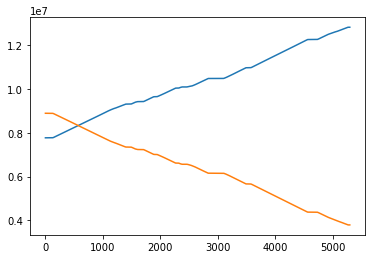

In [8]:
plt.plot(encoder_y)
plt.plot(encoder_x)
# plt.plot(encoder_mean)

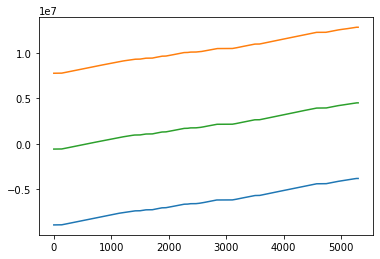

In [9]:
plt.plot(-encoder_x_new)
plt.plot(encoder_y_new)
plt.plot(encoder_mean)

In [10]:
odomdata_enc={'odom_seq':odom_seq, 'odom_time':odom_time, 'odom_x':odom_x, 'odom_y':odom_y, 'odom_theta':odom_theta, 'odom_vx':odom_vx,'odom_vy':odom_vy,'odom_vtheta':odom_vtheta}
odom_df_enc= pd.DataFrame(odomdata_enc, columns=['odom_seq','odom_time','odom_x','odom_y','odom_theta','odom_vx','odom_vy','odom_vtheta'])

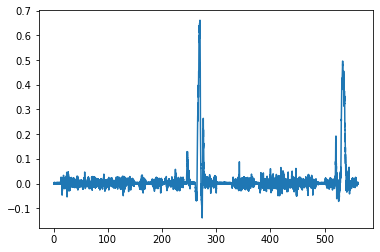

In [11]:
#PROCESS IMU DATA

# imureal_angvZ=imureal_angvZ-imureal_angvZ[0]
# imureal_angvX=imureal_angvX-imureal_angvX[0]
# imureal_angvY=imureal_angvY-imureal_angvY[0]

plt.figure(1)
plt.plot(imureal_time,-imureal_angvZ)
# thetaZ=integrate.cumtrapz(-imureal_angvZ,np.float64(imureal_time),initial=0)
# thetaX=integrate.cumtrapz(imureal_angvX,np.float64(imureal_time),initial=0)
# thetaY=integrate.cumtrapz(imureal_angvY,np.float64(imureal_time),initial=0)

# plt.figure(2)
# plt.plot(imureal_time,thetaZ)
#plt.plot(imureal_time,thetaX)
#plt.plot(imureal_time,thetaY)

imudata={'imureal_time':imureal_time, 'imureal_angvZ':imureal_angvZ}#, 'thetaZ':thetaZ}
imu_df = pd.DataFrame(imudata,columns=['imureal_time','imureal_angvZ'])#,'thetaZ'])

In [12]:
#INTERPOLATE THETA RTK_ENU

rtkenu_x_interp=interp1d(np.float64(rtkenu_time), rtkenu_x, kind='linear')
rtkenu_y_interp=interp1d(np.float64(rtkenu_time), rtkenu_y, kind='linear')
rtkenu_z_interp=interp1d(np.float64(rtkenu_time), rtkenu_z, kind='linear')

rtkenu_x_samp=rtkenu_x_interp(np.float64(rtkenu_time))
rtkenu_y_samp=rtkenu_y_interp(np.float64(rtkenu_time))
rtkenu_z_samp=rtkenu_z_interp(np.float64(rtkenu_time))


plt.plot(rtkenu_x_samp,rtkenu_y_samp)
plt.axis('equal')
plt.title('Path')
#datacursor()
plt.show()

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [15]:
gpsbestdata={'rtk_time':rtklla_time,'rtklla_lat':rtklla_lat,'rtklla_long':rtklla_long,'rtklla_alti':rtklla_alti}
gpsbest_df = pd.DataFrame(gpsbestdata,columns=['rtk_time','rtklla_lat','rtklla_long','rtklla_alti'])

RTKdata={'rtkfix_time':rtkfix_time,'rtkfix_lat':rtkfix_lat,'rtkfix_long':rtkfix_long,'rtkfix_alti':rtkfix_alti}
RTK_df = pd.DataFrame(RTKdata,columns=['rtkfix_time','rtkfix_lat','rtkfix_long','rtkfix_alti'])

In [16]:
#LASER DATA
laser_range=np.reshape(laser_range, (laser_time.size,int(laser_range.size/laser_time.size)))

laserdata={'laser_seq':laser_seq,'laser_time':laser_time}
laser_df = pd.DataFrame(laserdata,columns=['laser_seq','laser_time'])

In [17]:
sortingdata={'overall_time':overall_time, 'labels':labels}
sorting_df=pd.DataFrame(sortingdata, columns=['overall_time','labels'])

sorted_df=sorting_df.sort_values('overall_time')

In [18]:
#SAVE DATA

sorted_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-sorted.csv')

imu_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-imu.csv')

encoder_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-encoder.csv')
odom_df_enc.to_csv(saverpath+fileroot+'csv_data/'+filename  + '-odom_enc.csv')

RTK_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-RTK.csv')
gpsbest_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-gpsbest.csv')

laser_df.to_csv(saverpath+fileroot+'csv_data/'+filename + '-laser_timedata.csv')
np.savetxt(saverpath+fileroot+'csv_data/'+filename+ '-laser_rangedata.csv', laser_range, delimiter=",")

f=open(saverpath+fileroot+'csv_data/'+filename+ '-mainbag_zero.txt','w')
f.write(str(mainbag_time_zero))
f.close()
#np.savetxt(saverpath+fileroot+'csv_data/'+filename+ '-mainbag_zero.txt', mainbag_time_zero)


In [ ]:
gpsbestdata

In [ ]:
gpsbest_df